In [1]:
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Pull VIX historical data
ticker = "^VIX"

vix_history = yf.download(ticker, start='2018-01-01',progress=False)
vix_history = vix_history.asfreq(freq='D').ffill().dropna()
vix_history.to_csv('resources/vix.csv')
vix_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-17,26.510000,27.469999,25.25,25.670000,25.670000,0.0
2022-03-18,26.360001,26.820000,23.85,23.870001,23.870001,0.0
2022-03-19,26.360001,26.820000,23.85,23.870001,23.870001,0.0
2022-03-20,26.360001,26.820000,23.85,23.870001,23.870001,0.0
2022-03-21,25.139999,25.360001,22.99,23.530001,23.530001,0.0


In [3]:
# Pull S&P 500 historical data
ticker = "^GSPC" 

sp_history = yf.download(ticker, start='2018-01-01',progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-03-17,4345.109863,4412.669922,4335.649902,4411.669922,4411.669922,4.174170e+09
2022-03-18,4407.339844,4465.399902,4390.569824,4463.120117,4463.120117,6.681510e+09
2022-03-19,4407.339844,4465.399902,4390.569824,4463.120117,4463.120117,6.681510e+09
2022-03-20,4407.339844,4465.399902,4390.569824,4463.120117,4463.120117,6.681510e+09
2022-03-21,4462.399902,4481.750000,4424.299805,4461.180176,4461.180176,2.469825e+09


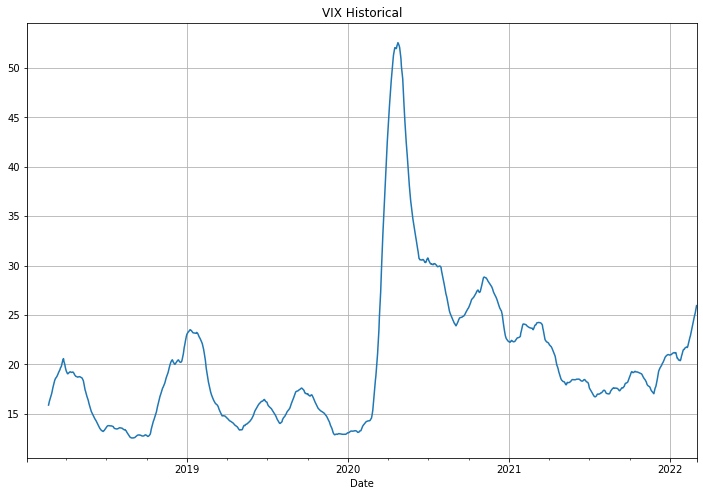

In [4]:
#Plot VIX 50-day rolling average
vix_plot = vix_history['Adj Close'].rolling(window=50).mean().plot(figsize=(12,8), title='VIX Historical', grid=True)

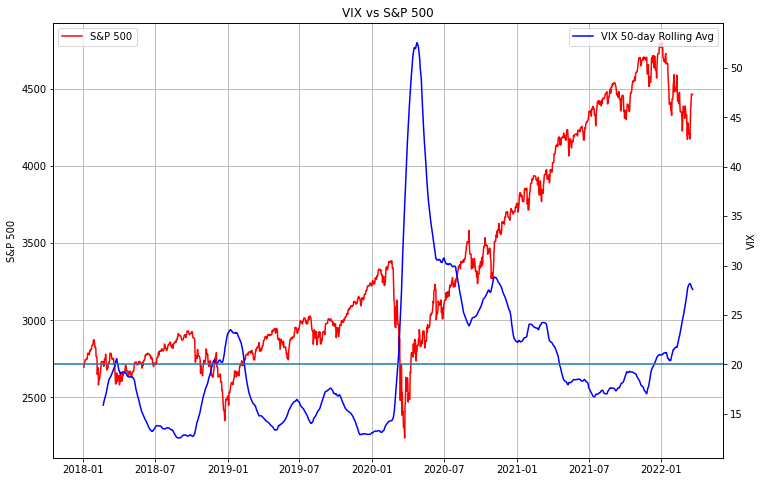

In [4]:
# Compare VIX to S&P Index and locate points where VIX crosses y value of 20 (arbitrarily selected) which is seen as fearful market
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P 500')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(vix_history['Adj Close'].rolling(window=50).mean(), label='VIX 50-day Rolling Avg', color='b')
ax2.set_title('VIX vs S&P 500')
ax2.set_ylabel('VIX')
ax2.legend(loc='upper right')
ax2.axhline(y=20)